# Introduction
This notebook presents some common NLP preprocessing methods. I use quotes from _the Hobbit_ as examples.

For most cases, I provide the code for both the NLTK and Spacy libraries, and highlight some of the differences that can be observed in the default behaviours of each library. 
How to customize these behaviours by using the parameters of the libraries is beyond the scope of this notebook.

# Download models and import libraries

In [1]:
# NLTK
import nltk

nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)

# Spacy
import spacy

# Sentence tokenization

**Sentence tokenization**: Split a text into individual sentences.
Let's take the text below as an example and use the standard sentence tokenizers in both NLTK and Spacy. NLTK returns 2 sentences, while Spacy returns 3: 

By default, Spacy considers the **':'** symbol to separate two sentences, while NLTK groups the sequence in a single sentence.

Let's use this text as an example: 

**_<span style="color:blue;">In a hole in the ground there lived a hobbit. Not a nasty, dirty, wet hole, filled with the ends of worms and an oozy smell, nor yet a dry, bare, sandy hole with nothing in it to sit down on or to eat: it was a hobbit-hole, and that means comfort.</span>_**

In [2]:
text = "In a hole in the ground there lived a hobbit. Not a nasty, dirty, wet hole, filled with the ends of worms and an oozy smell, nor yet a dry, bare, sandy hole with nothing in it to sit down on or to eat: it was a hobbit-hole, and that means comfort."

In [3]:
# NLTK
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(text)
print(len(sentences))
print(sentences)

2
['In a hole in the ground there lived a hobbit.', 'Not a nasty, dirty, wet hole, filled with the ends of worms and an oozy smell, nor yet a dry, bare, sandy hole with nothing in it to sit down on or to eat: it was a hobbit-hole, and that means comfort.']


In [4]:
# Spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
doc = nlp(text)

sentences = [str(s) for s in doc.sents]
print(len(sentences))
print(sentences)

3
['In a hole in the ground there lived a hobbit.', 'Not a nasty, dirty, wet hole, filled with the ends of worms and an oozy smell, nor yet a dry, bare, sandy hole with nothing in it to sit down on or to eat', ': it was a hobbit-hole, and that means comfort.']


# Word tokenization
**Word tokenization**: Split a text into individual words. We can also tag each word with their corresponding **Part Of Speech** (Verb, adverb, noun, etc).

Text example: **_<span style="color:blue;">In a hole in the ground there lived a hobbit.</span>_**


In [5]:
text = "In a hole in the ground there lived a hobbit."

In [6]:
# NLTK
word_tokens = nltk.word_tokenize(text)
print(word_tokens)

# With Part of Speech tagging
tagged = nltk.pos_tag(word_tokens)
print(tagged)

['In', 'a', 'hole', 'in', 'the', 'ground', 'there', 'lived', 'a', 'hobbit', '.']
[('In', 'IN'), ('a', 'DT'), ('hole', 'NN'), ('in', 'IN'), ('the', 'DT'), ('ground', 'NN'), ('there', 'RB'), ('lived', 'VBD'), ('a', 'DT'), ('hobbit', 'NN'), ('.', '.')]


In [7]:
# Spacy
nlp = en_core_web_sm.load()
doc = nlp(text)

# Print words with their POS
for word in doc:
    print(word.text,  word.pos_)

In ADP
a DET
hole NOUN
in ADP
the DET
ground NOUN
there ADV
lived VERB
a DET
hobbit NOUN
. PUNCT


A basic word tokenization can be performed by splitting a string on white spaces with the `.split()`method.
However, it doesn't take into account words that are glued together like the negation in:

**_<span style="color:blue;">Aren't you the burglar?</span>_**

However, both libraries take advantage of their knowledge of the english language to separate **_are_** and **_n't_**.

In [8]:
text = "Aren't you the burglar?"

# NLTK
word_tokens = nltk.word_tokenize(text)
print(word_tokens)

# Spacy
nlp = en_core_web_sm.load()
doc = nlp(text)
print([word.text for word in doc])

['Are', "n't", 'you', 'the', 'burglar', '?']
['Are', "n't", 'you', 'the', 'burglar', '?']


# N-grams
N-grams are groups of N consecutive words appearing in a text.
Let's code a function to extract all the N-grams of length _N_ from a text.



In [9]:
#Example using Spacy

def get_N_Grams(text, n):
    ngrams = []
    nlp = en_core_web_sm.load()
    word_list = nlp(text)
    word_list = [word.text for word in word_list if word.text.isalnum()]
    for i in range(len(word_list)-(n-1)):
        ngrams.append(word_list[i:i+n])
    return ngrams

Now, let's extract all the 3-grams (also called trigrams) from the text below.

Text example: **_<p style="color:blue;">In a hole in the ground there lived a hobbit.</p>_**


In [10]:
text = "In a hole in the ground there lived a hobbit."
print(get_N_Grams(text,3))

[['In', 'a', 'hole'], ['a', 'hole', 'in'], ['hole', 'in', 'the'], ['in', 'the', 'ground'], ['the', 'ground', 'there'], ['ground', 'there', 'lived'], ['there', 'lived', 'a'], ['lived', 'a', 'hobbit']]


# Stemming and Lemmatization

Both are methods to get the root of a word. 
* Stemming: The root doesn’t need to be an existing word.
* Lemmatization: The root must exist in the vocabulary.

## Stemming
Note: There's no stemming in Spacy.

Text example: **_<span style="color:blue;">We don't want any adventures here, thank you!</span>_**


In [11]:
text = "We don't want any adventures here, thank you!"

In [12]:
# NLTK
from nltk.stem import PorterStemmer
porter = PorterStemmer()
tokenized = nltk.word_tokenize(text)
stemmed_text = [porter.stem(word) for word in tokenized]
print(stemmed_text)

['We', 'do', "n't", 'want', 'ani', 'adventur', 'here', ',', 'thank', 'you', '!']


## Lemmatization
Notice that all the word roots obtained after lemmatization can actually be found in a dictionary.

Text example: **_<span style="color:blue;">Elvish singing is not a thing to miss</span>_**

In [13]:
text = "Elvish singing is not a thing to miss"


In [14]:
# NLTK
from nltk.stem import WordNetLemmatizer
wordnetLem = WordNetLemmatizer()
tokenized = nltk.word_tokenize(text)
for word in tokenized:
    print(word, wordnetLem.lemmatize(word, pos="v"))

Elvish Elvish
singing sing
is be
not not
a a
thing thing
to to
miss miss


In [15]:
# Spacy
nlp = en_core_web_sm.load()
doc = nlp(text)

for word in doc:
    print(word.text,  word.lemma_)

Elvish elvish
singing singing
is be
not not
a a
thing thing
to to
miss miss


For the word _singing_ , NLTK takes the root _sing_ , while Spacy keeps the word _singing_ as is. This is due to the fact that in this sentence, _singing_ is a noun. When faced with verbs ending in _-ing_ , both libraries use the base form of the verb, as can be seen in the other example below.

Text example: **_<p style="color:blue;">This is the story of how a Baggins had an adventure, and found himself doing and saying things altogether unexpected.</p>_**

In [16]:
text = "This is the story of how a Baggins had an adventure, and found himself doing and saying things altogether unexpected."
doc = nlp(text)
s=""
for word in doc:
    s+=word.lemma_+" "
print(s)

this be the story of how a Baggins have an adventure , and find -PRON- do and say thing altogether unexpected . 


In [17]:
text = "This is the story of how a Baggins had an adventure, and found himself doing and saying things altogether unexpected."
tokenized = nltk.word_tokenize(text)
s=""
for word in tokenized:
    s+=wordnetLem.lemmatize(word, pos="v")+" "
print(s)

This be the story of how a Baggins have an adventure , and find himself do and say things altogether unexpected . 


# Stop words
Stop words are common words that do not add information to the analysis. They are often removed from the text for word based approaches.

Let's remove the stop words from the text below.

Text example: **_<span style="color:blue;">In a hole in the ground there lived a hobbit.</span>_**

In [18]:
text = "In a hole in the ground there lived a hobbit."

In [19]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english')) 

tokenized = nltk.word_tokenize(text)
filtered = [w.lower() for w in tokenized if (not w.lower() in stop and w.isalnum())]
print(filtered)



['hole', 'ground', 'lived', 'hobbit']


In [20]:
from spacy.lang.en.stop_words import STOP_WORDS
doc = nlp(text)
token_list = [token.text for token in doc if token.is_punct == False]

filtered = [word for word in token_list if nlp.vocab[word].is_stop == False]
print(filtered)

['hole', 'ground', 'lived', 'hobbit']


# Bag of words
Bag of words is a representation in which each document of a corpus is represented by a vector. The length of the vector is the length of the vocabulary of all the words appearing in the corpus. Each dimension of the vector corresponds to a word in the vocabulary. The vector representation of a document contains a 1 at the position of a word if the document contains said word, and a 0 otherwise.

Alternatively, instead of a 1 if the word is present in a document, the vector can contain the number of occurences of the word.

Things will be clearer with an example.

Let's code Bag of words using nltk. We'll code it from scratch and will make use of the stop words removal and lemmatization we have seen previously.


We have a corpus of 3 short documents, of one sentence each.

Document 1: **_<span style="color:blue;">I wish I was at home [...] with the kettle just beginning to sing!</span>_**

Document 2: **_<span style="color:blue;">Home is now behind you, the world is ahead!</span>_**

Document 3: **_<span style="color:blue;">He jumped up to [...] put his kettle on — and found he was not home at all.</span>_**

First, let's build the vocabulary, the list of all individual words appearing in the corpus. We do so by first removing the stop words and punctuation, and then lemmatizing the remaining words.

In [21]:
t1 = "I wish I was at home [...] with the kettle just beginning to sing!"
t2 = "Home is now behind you, the world is ahead!"
t3 = "He jumped up to [...] put his kettle on — and found he was not home at all."

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def get_list_words(text):
    lem = WordNetLemmatizer()
    stop = set(stopwords.words('english')) 
    tokenized = nltk.word_tokenize(text)
    f =  [w.lower() for w in tokenized]
    return [lem.lemmatize(w.lower(), pos="v") for w in tokenized \
           if (not w.lower() in stop and w.isalnum())]


filtered1 = get_list_words(t1)
filtered2 = get_list_words(t2)
filtered3 = get_list_words(t3)

vocab = list(set(filtered1+filtered2+filtered3))

print(vocab)

['begin', 'sing', 'put', 'wish', 'behind', 'home', 'ahead', 'jump', 'find', 'kettle', 'world']


Now that we have the vocabulary, let's build the vector representations for all three documents.

In [22]:
def get_bow_vector(vocab, document):
    filtered = get_list_words(document)
    v = []
    for w in vocab:
        c = 1 if w in filtered else 0
        v.append(c)
    return v


print(get_bow_vector(vocab, t1))
print(get_bow_vector(vocab, t2))
print(get_bow_vector(vocab, t3))

[1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1]
[0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0]


The first document contains the word **_home_**, so the first element of the vector is a **1**. But it doesn't contain the word **jump**, so the second element of the vector is a **0**.

## With scikit-learn
Now, let's see how to use Bag of words with **scikit-learn**. By default, it doesn't remove the stop words and counts the occurences of the words. It's highly customizable, so this behavior can be changed.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
corpus = [t1,t2,t3]
vectorizer = CountVectorizer()
vectorizer.fit(corpus)

# Print vocabulary in order
d = vectorizer.vocabulary_
import operator
vocab = sorted(d.items(), key=operator.itemgetter(1))
print(vocab)

# Get BoW vectors
vector = vectorizer.transform(corpus)
print(vector.toarray())

[('ahead', 0), ('all', 1), ('and', 2), ('at', 3), ('beginning', 4), ('behind', 5), ('found', 6), ('he', 7), ('his', 8), ('home', 9), ('is', 10), ('jumped', 11), ('just', 12), ('kettle', 13), ('not', 14), ('now', 15), ('on', 16), ('put', 17), ('sing', 18), ('the', 19), ('to', 20), ('up', 21), ('was', 22), ('wish', 23), ('with', 24), ('world', 25), ('you', 26)]
[[0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0]
 [1 0 0 0 0 1 0 0 0 1 2 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1]
 [0 1 1 1 0 0 1 2 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0]]


# TF-IDF
TF-IDF: Term Frequency–Inverse Document Frequency

TF(t,d) = Number of occurence of word _t_ in document _d_

IDF(t,C) = $\log\frac{N}{|{d\in C: t\in d}|}$

It's the _log_ of the number of documents in the corpus divided by the number of documents that contain the word _t_.
An additional term +1 is often added to the denominator to prevent divisions by 0.

TF-IDF score: TF(t,d)$*$IDF(t,C)

Let's run TF-IDF on the same corpus of documents we used for BoW. 


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [t1,t2,t3]
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

# Print vocabulary in order
d = vectorizer.vocabulary_
import operator
vocab = sorted(d.items(), key=operator.itemgetter(1))
print('Vocabulary:')
print(vocab)

print('Idf for each word:')
print(vectorizer.idf_)

#Get Tf-Idf scores for the first document
print('TF-IDF scores for document 1:')
vector = vectorizer.transform([t1])
print(vector.toarray())

Vocabulary:
[('ahead', 0), ('all', 1), ('and', 2), ('at', 3), ('beginning', 4), ('behind', 5), ('found', 6), ('he', 7), ('his', 8), ('home', 9), ('is', 10), ('jumped', 11), ('just', 12), ('kettle', 13), ('not', 14), ('now', 15), ('on', 16), ('put', 17), ('sing', 18), ('the', 19), ('to', 20), ('up', 21), ('was', 22), ('wish', 23), ('with', 24), ('world', 25), ('you', 26)]
Idf for each word:
[1.69314718 1.69314718 1.69314718 1.28768207 1.69314718 1.69314718
 1.69314718 1.69314718 1.69314718 1.         1.69314718 1.69314718
 1.69314718 1.28768207 1.69314718 1.69314718 1.69314718 1.69314718
 1.69314718 1.28768207 1.28768207 1.69314718 1.28768207 1.69314718
 1.69314718 1.69314718 1.69314718]
TF-IDF scores for document 1:
[[0.         0.         0.         0.26492845 0.34834908 0.
  0.         0.         0.         0.20574058 0.         0.
  0.34834908 0.26492845 0.         0.         0.         0.
  0.34834908 0.26492845 0.26492845 0.         0.26492845 0.34834908
  0.34834908 0.         0.

# NER
Named Entity Recognition identifies entities in a text. It's a very useful tool in NLP.
Let's see an example using Spacy.

Text example: **_<span style="color:blue;">Not that Belladonna Took ever had any adventures after she became Mrs. Bungo Baggins. Bungo, that was Bilbo’s father, built the most luxurious hobbit-hole for her (and partly with her money) that was to be found either under The Hill or over The Hill or across The Water, and there they remained to the end of their days.</span>_**

In [25]:
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

text = """Not that Belladonna Took ever had any adventures after she became Mrs. Bungo Baggins. Bungo, that was Bilbo’s father, built the most luxurious hobbit-hole for her (and partly with her money) that was to be found either under The Hill or over The Hill or across The Water, and there they remained to the end of their days."""

doc = nlp(text)
displacy.render(doc, jupyter=True, style='ent')

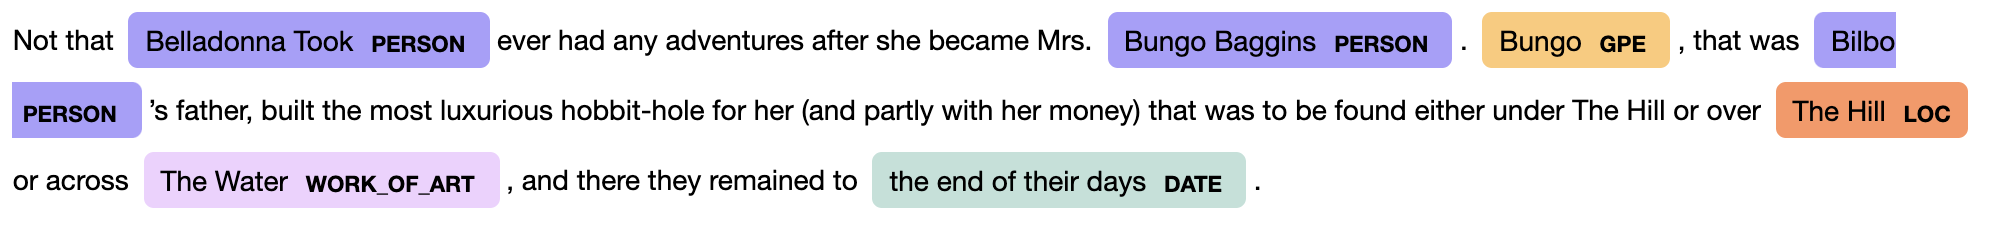